<a href="#1-Silhouette-Score" style="margin-left: 0px;">1 Silhouette Score</a>  
<a href="#2-K-means" style="margin-left: 0px;">2 K-means</a>  
<a href="#3-DBSCAN" style="margin-left: 0px;">3 DBSCAN</a>  
<a href="#4-Hierarchical-Clustering-(AgglomerativeClustering)" style="margin-left: 0px;">4 Hierarchical Clustering (AgglomerativeClustering)</a>  
<a href="#5-Gaussian-Mixture-algorithm" style="margin-left: 0px;">5 Gaussian Mixture algorithm</a>  

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
import ast
import time

In [2]:
data = pd.read_csv(r"../00 Data/geographical coordinates.csv")
print(data.shape)
data.head()

(36257, 3)


,latitude,longitude,price
0,40.7344,-73.9823,4295
1,40.7109,-74.0165,2395
2,40.7779,-73.9525,3600
3,40.7434,-73.9746,6200
4,40.7855,-73.9725,3850


### 1 Silhouette Score

#### Оценка силуэта (Silhouette Score)

Оценка силуэта измеряет, насколько хорошо каждый объект кластеризован.

#### Формула:
Для каждого объекта $i$ силуэтная оценка рассчитывается как:

$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$

где:
- $a(i)$ — среднее расстояние от точки $i$ до всех остальных точек своего кластера (внутрикластерное расстояние).
- $b(i)$ — среднее расстояние от точки $i$ до точек ближайшего соседнего кластера (межкластерное расстояние).

#### Интерпретация:
- $s(i) \approx 1$ → точка хорошо кластеризована.
- $s(i) \approx 0$ → точка находится на границе между кластерами.
- $s(i) \approx -1$ → точка ошибочно помещена в кластер.

#### Общая оценка силуэта:
Общая оценка силуэта — это среднее значение $s(i)$ для всех точек:

$S = \frac{1}{N} \sum_{i=1}^{N} s(i)$

Где $N$ — общее количество объектов.

### 2 K-means

Кластеризация K-means - это метод разбиения данных на k кластеров.  

k- количество кластеров.  
1.1) Выбираем k случайных точек в качестве центра кластеров  
1.2) Распределеяем точки по центрам (к какому центру точка ближе)  
1.3) Пересчитаем центры, как среднеарифмитическое точек из одного кластера  
1.4) Пересчитаем кластеры  
Пересчитываем до тех пор, пока результат не будет приемлем.   

**Инициализация начальных точек:**   

#### 1 Forgy (Форги)

📌 Суть метода: Выбираем K случайных точек из данных и используем их как начальные центроиды.  

Алгоритм:  

Выбираем случайно K точек из исходного набора данных.  
Назначаем эти K точек как начальные центроиды.  
Далее выполняется стандартный алгоритм K-Means (назначение точек кластерам и пересчёт центроидов).  

Плюсы:  
✅ Простота и быстрая реализация.  
✅ Хорошо работает, если данные равномерно распределены.  

Минусы:  
❌ Может дать плохие центроиды, если данные сильно разрежены или есть выбросы.  
❌ Иногда приводит к неудачной кластеризации (может выбрать центроиды слишком близко друг к другу).  

#### 2 Random Partition (Случайное разбиение)   
📌 Суть метода: Каждой точке случайно присваивается один из K кластеров, затем центроиды вычисляются как среднее этих точек.  

Алгоритм:  
Случайным образом распределяем все точки между K кластерами.  
Для каждого кластера вычисляем среднее значение всех точек → это будут наши начальные центроиды.  
Далее выполняется стандартный алгоритм K-Means.  

Плюсы:  
✅ Центроиды сразу находятся в центре групп точек, а не в случайных местах.  
✅ Более устойчива к выбросам, чем Forgy.  

Минусы:  
❌ Может дать плохую начальную инициализацию, если случайное разбиение распределит точки неравномерно.  
❌ В некоторых случаях требует больше итераций для сходимости.  

### 3 K-means++  

📌 Суть метода: Улучшенная инициализация центроидов, при которой они выбираются с учётом расстояния между точками, чтобы избежать плохих начальных условий.

#### Шаги инициализации K-means++

1. **Выбираем первый центроид** случайно из всех точек данных.

2. **Для каждой точки вычисляем квадрат расстояния до ближайшего существующего центроида:**

   $$
   D(x_i)^2 = \min_{\text{центроиды } c_j} \|x_i - c_j\|^2
   $$

3. **Вычисляем веса (вероятности выбора) для каждой точки:**

   $$
   P(x_i) = \frac{D(x_i)^2}{\sum_{k=1}^{N} D(x_k)^2}
   $$
   
4. **Выбираем следующий центроид случайно, но с учётом вероятностей** $P(x_i)$  
   (чем больше $D(x_i)^2$, тем выше шанс быть выбранным).

5. **Повторяем шаги 2–4**, пока не выберем **K центроидов**.  
Когда выбираем 3-ий центроид, то считаем расстояние каждой точки не центройда (все точки кроме двух) до ближайшего центройда, то есть какие-то расстояния будут считаться до 1-го центройда, а какие-то до 2-го  


Далее выполняется стандартный алгоритм K-means.

Плюсы:  
✅ Уменьшает вероятность плохой инициализации (центроиды не оказываются слишком близко друг к другу).  
✅ Часто приводит к лучшей кластеризации и меньшему количеству итераций для сходимости.  
✅ Рекомендован на практике как стандартный метод инициализации в большинстве реализаций (например, в sklearn.cluster.KMeans).

Минусы:  
❌ Вычислительная сложность выше, чем у Forgy или Random Partition (из-за расчёта расстояний).  
❌ Не гарантирует глобальный оптимум, но даёт более стабильные результаты, чем чисто случайные методы.  

### Сравнение методов инициализации центров кластеров

| Метод            | Скорость      | Устойчивость к выбросам | Качество инициализации  |
|------------------|---------------|---------------------------|--------------------------|
| **Forgy**        | ⚡ Быстрый     | ❌ Низкая                 | ❌ Случайное             |
| **Random Partition** | ⚡ Быстрый | ✅ Средняя                | ❌ Зависит от разбиения  |
| **K-means++**    | ⏳ Медленнее   | ✅ Высокая                | ✅ Оптимальное           |


In [3]:
class My_KMeans():
    
    def __init__(self,n_clusters=4, random_state=42, num_of_iterations=300,tol=1e-4):
        
        self.n_clusters=n_clusters
        self.random_state=random_state
        self.num_of_iterations=num_of_iterations
        self.tol = tol
        np.random.seed(self.random_state)
        self.centroid_points = None
        
    def fit_predict(self,X):
        
        min_values = X.min(axis=0)
        max_values = X.max(axis=0)
        
        # Инициализация центроидов: случайный выбор точек из данных
        random_indices = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroid_points_new = X.iloc[random_indices].values
        
        # print(centroid_points_new)
        
        iteration=0
        
        # пока итераций <300
        while iteration<self.num_of_iterations:
            
            self.centroid_points = centroid_points_new.copy()
            # print(iteration, self.centroid_points)
            
            # определяем новые классы для каждой точки как наиболее близкое к своему центройду
            new_classes = self.assign_nearest_point(X, self.centroid_points)
            
            centroid_points_new = []
            
            # Для каждого уникального кластера в new_classes вычисляем центроид
            # Берем сначала cluster_id = 0 и для него вычисляем координатц центройда
            for cluster_id in np.unique(new_classes):
                # Индексы точек, принадлежащих текущему кластеру
                points_in_cluster = X[new_classes == cluster_id]

                # Вычисляем среднее (центроид) для точек текущего кластера
                centroid = np.mean(points_in_cluster, axis=0)

                # Добавляем центроид в список
                centroid_points_new.append(centroid)
            
            centroid_points_new = np.array(centroid_points_new)
            
            # print(centroid_points_new)
            # если максимальный сдвиг одного центройда < 1e-4 то останавливаем обучение
            if np.max(np.linalg.norm(centroid_points_new - self.centroid_points, axis=1)) < self.tol:
                break
            
            iteration+=1
            
        self.centroid_points = centroid_points_new
        
        # возвращает массив NumPy классов
        return new_classes
        
    
    # ф-я для вычисления нового класса для каждой точки
    def assign_nearest_point(self,X, centroid_points):
        # Вычисляем расстояния между всеми точками X и точками центройдами
        distances = cdist(X, centroid_points, metric='euclidean')

        # Для каждой точки из X находим номер класса
        new_classes = np.argmin(distances, axis=1)

        return new_classes
        
    def predict(self, X):
        # Предсказание меток на новых данных
        return self.assign_nearest_point(X, self.centroid_points)

In [4]:
%%time

# Что делает n_init?
# Этот параметр указывает, сколько раз алгоритм KMeans будет запускаться с разными начальными центроидами, 
# выбирая лучший результат.

# n_init=10 (по умолчанию в sklearn <1.4) — пробует 10 раз.
# n_init='auto' (новый вариант) — выбирает оптимальное количество запусков.

kmeans = KMeans(n_clusters=30, n_init='auto', random_state=42)
data['cluster_label_k_means_scklearn'] = kmeans.fit_predict(data[['longitude', 'latitude']])

CPU times: total: 438 ms
Wall time: 567 ms


In [5]:
%%time

my_kmeans = My_KMeans(n_clusters=30, random_state=42)
data['cluster_label_k_means_My'] = my_kmeans.fit_predict(data[['longitude', 'latitude']])

CPU times: total: 1.55 s
Wall time: 1.25 s


In [6]:
%%time

# Оценка силуэта sklearn
silhouette_k_means_sklearn = silhouette_score(data[['longitude', 'latitude']], data['cluster_label_k_means_scklearn'])
print(f"Silhouette Score: {silhouette_k_means_sklearn}")

Silhouette Score: 0.46976863052936335
CPU times: total: 1min
Wall time: 35.1 s


In [7]:
%%time

# Оценка силуэта sklearn
silhouette_k_means_my = silhouette_score(data[['longitude', 'latitude']], data['cluster_label_k_means_My'])
print(f"Silhouette Score: {silhouette_k_means_my}")

Silhouette Score: 0.4201735693958382
CPU times: total: 49.6 s
Wall time: 20.2 s


### Нарисуем кластеры

In [8]:
y_kmeans_sklearn = data['cluster_label_k_means_scklearn'].values

y_kmeans_My = data['cluster_label_k_means_My'].values

X = data[['longitude', 'latitude']].values

print(min(y_kmeans_sklearn),max(y_kmeans_sklearn))
print(min(y_kmeans_My),max(y_kmeans_My))
print(y_kmeans_sklearn.shape)
print(X.shape)

0 29
0 29
(36257,)
(36257, 2)


### Sklearn

<Figure size 800x600 with 0 Axes>

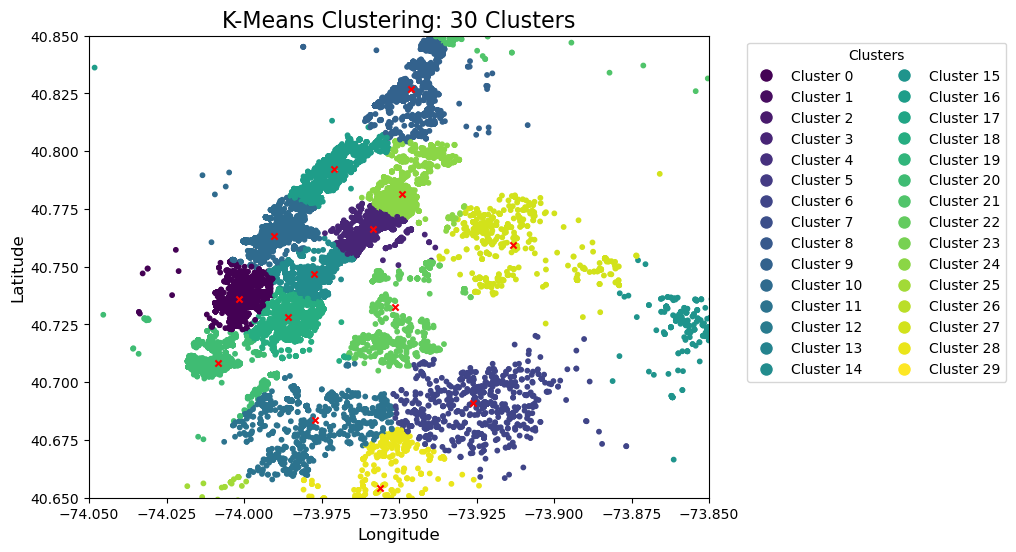

In [9]:
plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))

# Отображаем все точки, разделяя их по цвету на основании их кластера
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_sklearn, cmap='viridis', s=10)

# Отображаем центры кластеров
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=20, marker='x', label='Centroids')

# Создаем фиктивные объекты для легенды (кружочки для каждого кластера)
legend_handles = []
unique_clusters = np.unique(y_kmeans_sklearn)  # Все уникальные кластеры, которые присутствуют в данных
for i in unique_clusters:
    legend_handles.append(mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / (len(unique_clusters) - 1)), markersize=10, label=f'Cluster {i}'))

# Задаем границы для осей X и Y
plt.xlim(-74.050, -73.85)  # для оси X
plt.ylim(40.650, 40.850)  # для оси Y

# Добавляем подписи
plt.title('K-Means Clustering: 30 Clusters', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Сдвигаем легенду вправо и разбиваем на 2 колонки
plt.legend(handles=legend_handles, title='Clusters', ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')

# Показываем график
plt.show()

### My

<Figure size 800x600 with 0 Axes>

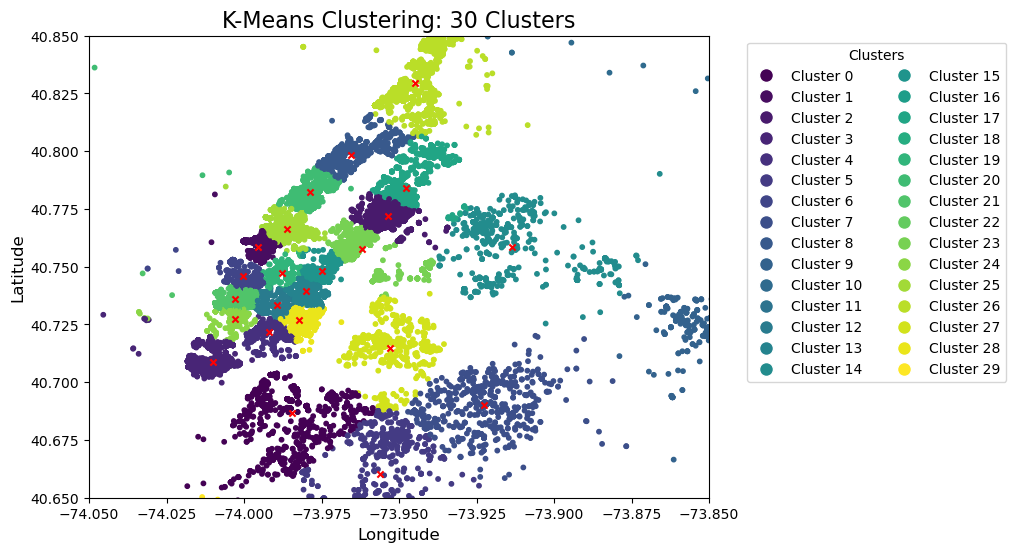

In [10]:
plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))

# Отображаем все точки, разделяя их по цвету на основании их кластера
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_My, cmap='viridis', s=10)

# Отображаем центры кластеров
plt.scatter(my_kmeans.centroid_points[:, 0], my_kmeans.centroid_points[:, 1], c='red', s=20, marker='x', label='Centroids')

# Создаем фиктивные объекты для легенды (кружочки для каждого кластера)
legend_handles = []
unique_clusters = np.unique(y_kmeans_My)  # Все уникальные кластеры, которые присутствуют в данных
for i in unique_clusters:
    legend_handles.append(mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / (len(unique_clusters) - 1)), markersize=10, label=f'Cluster {i}'))

# Задаем границы для осей X и Y
plt.xlim(-74.050, -73.85)  # для оси X
plt.ylim(40.650, 40.850)  # для оси Y

# Добавляем подписи
plt.title('K-Means Clustering: 30 Clusters', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Сдвигаем легенду вправо и разбиваем на 2 колонки
plt.legend(handles=legend_handles, title='Clusters', ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')

# Показываем график
plt.show()

### 3 DBSCAN

1. Задание параметров  
eps (эпсилон) — радиус окрестности точки.  
min_samples — минимальное количество точек (включая саму точку), необходимых для образования кластера.  

2. Классификация точек  
Каждая точка может быть:  

Core (ядро) — если в радиусе eps есть не менее min_samples точек.  
Border (граница) — если сама не является ядром, но входит в окрестность ядра.  
Noise (шум) — если не попадает в предыдущие категории.  

Алгоритм:

1) Поместить все точки как основные, пограничные и шумовые  
2) Отбросить "шумовые" точки  
3) Соединить все "основные" точки на расстоянии ε  
4) Соединенные точки обозначи за кластер  
5) Назначить все пограничные точки своему кластеру (по количеству основных точек в окрестности)  

4. Пометка шума  
Точки, не попавшие в кластеры, считаются шумом (-1).  

In [11]:
from sklearn.cluster import DBSCAN
from scipy.spatial import distance

### Sklearn

In [12]:
%%time

# Обучаем DBSCAN

dbscan = DBSCAN(eps=0.001, min_samples=5)  # eps и min_samples нужно подбирать
data['cluster_label_dbscan_scklearn'] = dbscan.fit_predict(data[['longitude', 'latitude']])

CPU times: total: 391 ms
Wall time: 420 ms


In [13]:
from sklearn.metrics import pairwise_distances_argmin_min

In [14]:
# Функция для присвоения кластеров DBSCAN
def assign_dbscan_cluster(X_test, X_train, train_labels):
    """
    Функция присваивает метки кластеров тестовым данным, основываясь на ближайших центроидах кластеров из обучающих данных.
    """
    # Вычисляем центроиды кластеров обучающей выборки
    centroids = []
    for cluster_id in np.unique(train_labels):
        if cluster_id != -1:  # Не учитываем выбросы (метка -1)
            cluster_points = X_train[train_labels == cluster_id]
            centroids.append(np.mean(cluster_points, axis=0))
    centroids = np.array(centroids)

    # Для каждого тестового образца находим ближайший центр
    labels = pairwise_distances_argmin_min(X_test, centroids)[0]
    
    return labels

### My_DBSCAN

1) заполняем все labels значениями "-1" означает шум  
2) идём циклом по каждой точке:

2.1) Если labels у точки Уже не -1 (обработанная точка), то ничего с ней не делаем  

2.2) Находим соседей точки i (индексы, включая саму точку)

2.3) если количество соседей < минимального порога количества соседей => оставляем label=-1 и не делаем expand_cluster 
2.4) если количество соседей >= минимального порога количества соседей => Создаем новый кластер применяя expand_cluster

**expand_cluster**  

1) Создаем очередь из индексов соседей queue  = list(neighbors)  

2) пока queue очередь не пустая:  

2.1) удаляем первый индекс из очереди (neighbor_idx = queue.pop(0))  

2.2) Если эта точка не была еще почечена (self.labels[neighbor_idx] == -1), то помечаем ее соответствующим кластером 

2.3) если эта точка уже была помечена, то ничего не делаем  

2.4) Ищем соседей, которые меньше некого расстояния eps и еще не были помечены:  

new_neighbors = self.region_query(X, neighbor_idx)  

2.5) добавляем этих соседей в очередь queue.extend(new_neighbors)

In [15]:
class My_DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps # дистанция определяющая соседей
        self.min_samples = min_samples # минимальное количество соседея для образования ядра кластера
        self.labels = None # после обучения array массив длиной X c номерами класса

    def fit_predict(self, X):
        
        X = X.to_numpy()
        n_samples = X.shape[0]
        self.labels = np.full(n_samples, -1)  # заполняем все labels значениями "-1" означает шум 
        cluster_id = 0  # Индекс первого кластера
        
        # идём циклом по каждой точке
        for i in range(n_samples):
            
            # Если labels у точки Уже не -1 (обработанная точка), то ничего с ней не делаем
            if self.labels[i] != -1:
                continue  
            
            # Найти соседей точки i (индексы, включая саму точку)
            neighbors = self.region_query(X, i)
            
            # если количество соседей меньше минимального порога количества соседей, 
            # то оставляем label=-1 и не делаем expand_cluster
            if len(neighbors) < self.min_samples: 
                continue  # Шумовая точка

            # Создаем новый кластер
            self.expand_cluster(X, i, neighbors, cluster_id)
            cluster_id += 1
        
        return self.labels

    
    # Находим индексы соседей точки idx в радиусе eps включая саму точку idx
    def region_query(self, X, idx):
        
        # np.linalg.norm(..., axis=1) — вычисляем Евклидово расстояние от X[idx] до каждой точки X.
        distances = np.linalg.norm(X - X[idx], axis=1)
        return np.where(distances <= self.eps)[0] # получаем индексы этих точек которые ближе, чем eps

    
    # Расширение кластера за счёт соседей
    def expand_cluster(self, X, idx, neighbors, cluster_id):
        
        self.labels[idx] = cluster_id
        queue = list(neighbors)  # Используем list вместо np.array()

        while queue:
            neighbor_idx = queue.pop(0)  # Берём первый элемент и удаляем его из queue

            if self.labels[neighbor_idx] == -1:  # Если точка была не обработана
                self.labels[neighbor_idx] = cluster_id

            if self.labels[neighbor_idx] != -1:  # Уже обработанная точка
                continue  

            # Назначаем кластер
            self.labels[neighbor_idx] = cluster_id  

            # Найти соседей этой точки
            new_neighbors = self.region_query(X, neighbor_idx)

            # Добавляем только новые точки, которые ещё не были посещены
            new_neighbors = [n for n in new_neighbors if self.labels[n] == -1]

            queue.extend(new_neighbors)  # Вместо np.append()

In [16]:
%%time

# Обучаем My_DBSCAN

dbscan_my = My_DBSCAN(eps=0.0045, min_samples=5)  # eps и min_samples нужно подбирать
data['cluster_label_dbscan_My'] = dbscan_my.fit_predict(data[['longitude', 'latitude']])

CPU times: total: 172 ms
Wall time: 180 ms


In [17]:
%%time

# Оценка силуэта sklearn
silhouette_dbscan_sklearn = silhouette_score(data[['longitude', 'latitude']], data['cluster_label_dbscan_scklearn'])
print(f"Silhouette Score: {silhouette_dbscan_sklearn}")

Silhouette Score: -0.0746430828615662
CPU times: total: 49 s
Wall time: 19.6 s


In [18]:
%%time

# Оценка силуэта sklearn
silhouette_dbscan_my = silhouette_score(data[['longitude', 'latitude']], data['cluster_label_dbscan_My'])
print(f"Silhouette Score: {silhouette_dbscan_my}")

Silhouette Score: 0.19274300290741594
CPU times: total: 53.6 s
Wall time: 19.6 s


### Нарисуем кластеры

In [19]:
y_dbscan_sklearn = data['cluster_label_dbscan_scklearn'].values

y_dbscan_My = data['cluster_label_dbscan_My'].values

X = data[['longitude', 'latitude']].values

print(min(y_dbscan_sklearn),max(y_dbscan_sklearn))
print(min(y_dbscan_My),max(y_dbscan_My))
print(y_dbscan_sklearn.shape)
print(X.shape)

-1 448
-1 419
(36257,)
(36257, 2)


### Sklearn

<Figure size 800x600 with 0 Axes>

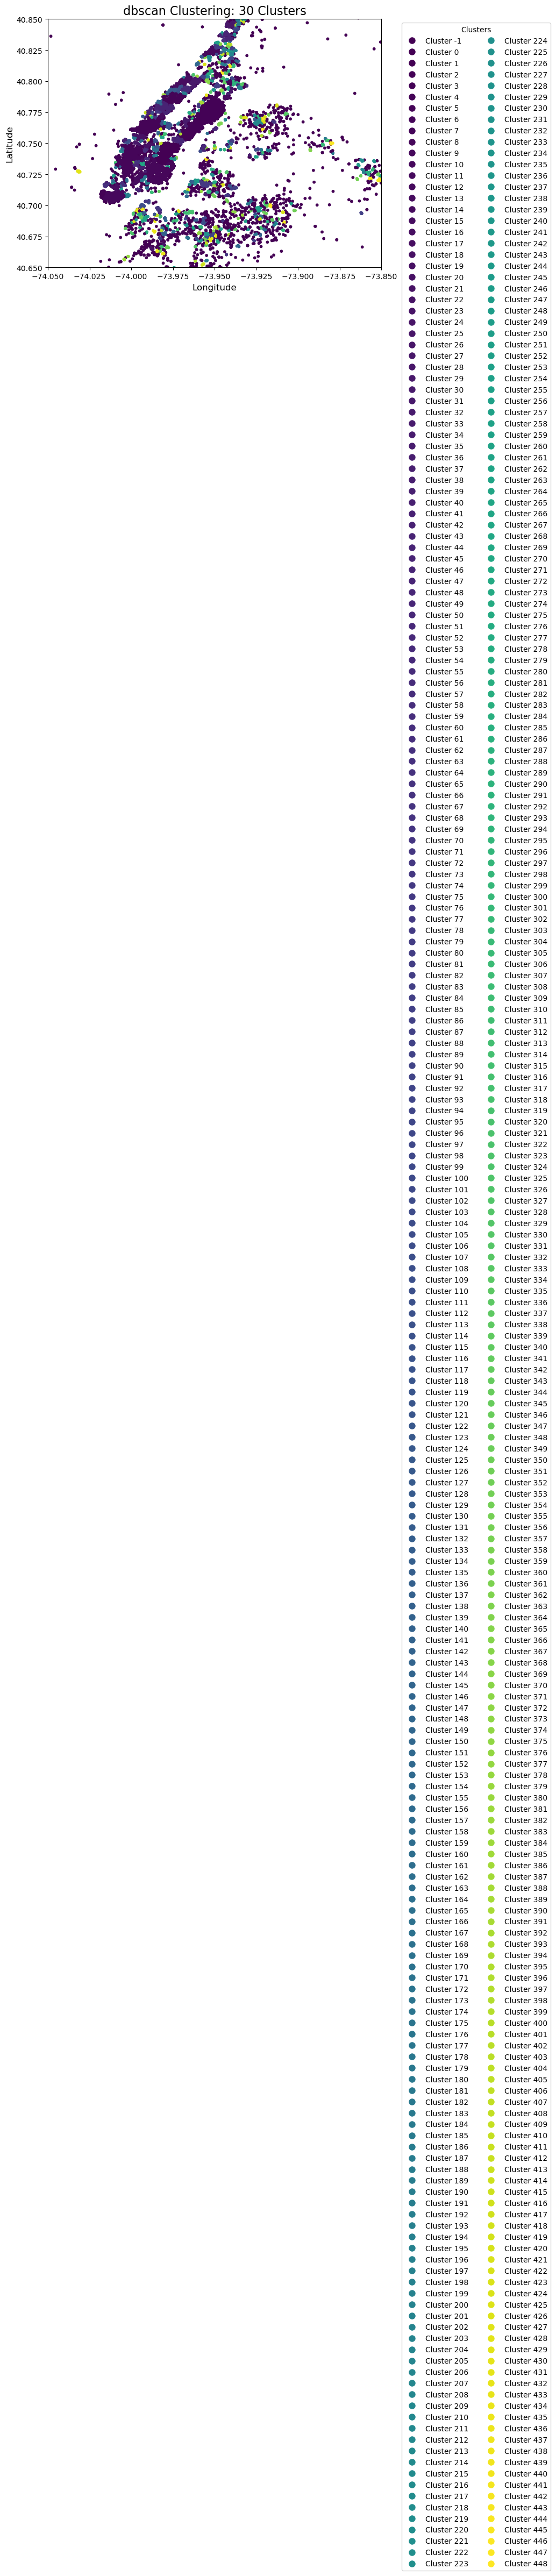

In [20]:
plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))

# Отображаем все точки, разделяя их по цвету на основании их кластера
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_dbscan_sklearn, cmap='viridis', s=10)

# Создаем фиктивные объекты для легенды (кружочки для каждого кластера)
legend_handles = []
unique_clusters = np.unique(y_dbscan_sklearn)  # Все уникальные кластеры, которые присутствуют в данных
for i in unique_clusters:
    legend_handles.append(mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / (len(unique_clusters) - 1)), markersize=10, label=f'Cluster {i}'))

# Задаем границы для осей X и Y
plt.xlim(-74.050, -73.85)  # для оси X
plt.ylim(40.650, 40.850)  # для оси Y

# Добавляем подписи
plt.title('dbscan Clustering: 30 Clusters', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Сдвигаем легенду вправо и разбиваем на 2 колонки
plt.legend(handles=legend_handles, title='Clusters', ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')

# Показываем график
plt.show()

### My

<Figure size 800x600 with 0 Axes>

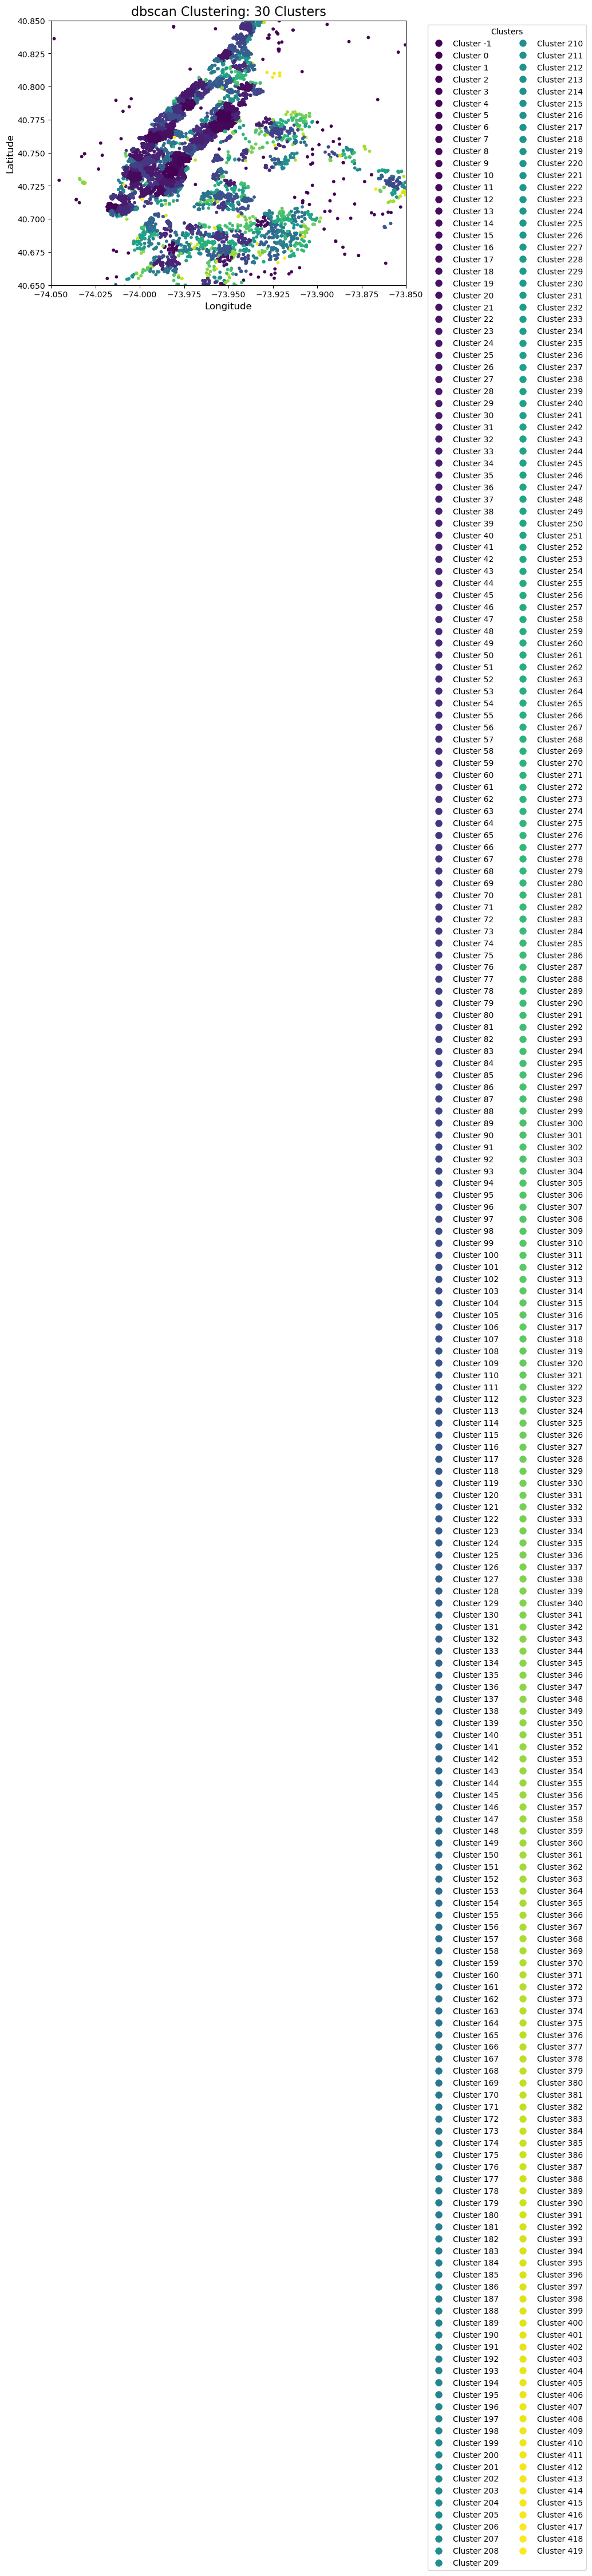

In [21]:
plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))

# Отображаем все точки, разделяя их по цвету на основании их кластера
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_dbscan_My, cmap='viridis', s=10)

# Создаем фиктивные объекты для легенды (кружочки для каждого кластера)
legend_handles = []
unique_clusters = np.unique(y_dbscan_My)  # Все уникальные кластеры, которые присутствуют в данных
for i in unique_clusters:
    legend_handles.append(mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / (len(unique_clusters) - 1)), markersize=10, label=f'Cluster {i}'))

# Задаем границы для осей X и Y
plt.xlim(-74.050, -73.85)  # для оси X
plt.ylim(40.650, 40.850)  # для оси Y

# Добавляем подписи
plt.title('dbscan Clustering: 30 Clusters', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Сдвигаем легенду вправо и разбиваем на 2 колонки
plt.legend(handles=legend_handles, title='Clusters', ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')

# Показываем график
plt.show()

### 4 Hierarchical Clustering (AgglomerativeClustering)

**Hierarchical Clustering** - Это общее название для методов кластеризации, которые строят иерархию кластеров в виде дендрограммы. Делится на два типа:  

**Agglomerative (Агломеративная)** — "снизу вверх": начинается с отдельных точек и последовательно объединяет ближайшие кластеры.  

**Divisive (Дивизивная)** — "сверху вниз": начинается с одного кластера и рекурсивно разделяет его на меньшие.  

### AgglomerativeClustering

1️⃣ Инициализация  
Каждая точка (объект) из набора данных начинается как отдельный кластер.  
Если в данных n точек, то в начале будет n кластеров.  

2️⃣ Определение расстояний между кластерами  
На каждом шаге выбираются два ближайших кластера и объединяются.  
Расстояние между кластерами можно считать разными способами (параметр linkage в AgglomerativeClustering):  

single linkage — расстояние между ближайшими точками двух кластеров.  
complete linkage — расстояние между самыми удаленными точками двух кластеров.  
average linkage — среднее расстояние между всеми парами точек из двух кластеров.  
ward linkage (по умолчанию) — объединяет кластеры, минимизируя дисперсию внутри кластеров.  

3️⃣ Объединение кластеров  
На каждом шаге алгоритм объединяет два наиболее похожих (близких) кластера.  
Количество кластеров уменьшается на 1.  
Процесс повторяется, пока не останется нужное количество кластеров (n_clusters). 

4️⃣ Формирование итоговых кластеров  
Процесс продолжается, пока не останется n_clusters, заданное пользователем.  
Если n_clusters не задано, можно использовать distance_threshold, при котором алгоритм объединяет кластеры, пока расстояние между ними не станет больше порога.  

Преимущество данного метода: Можно построить дендограмму

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
%%time 

# Определяем модель агломеративной кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=30, linkage='ward')  # Укажи нужное число кластеров
data['cluster_label_ac_scklearn'] = agg_clustering.fit_predict(data[['longitude', 'latitude']])

CPU times: total: 6min 41s
Wall time: 46min 4s


In [24]:
from sklearn.neighbors import NearestNeighbors

In [25]:
# Оценка силуэта sklearn
silhouette_ac_train_sklearn = silhouette_score(data[['longitude', 'latitude']], data['cluster_label_ac_scklearn'])
print(f"Silhouette Score: {silhouette_ac_train_sklearn}")

Silhouette Score: 0.44086888665892326


### Нарисуем кластеры

In [27]:
y_ac_sklearn = data['cluster_label_ac_scklearn'].values


print(min(y_ac_sklearn),max(y_ac_sklearn))
print(y_ac_sklearn.shape)
print(X.shape)

0 29
(36257,)
(36257, 2)


### Sklearn

<Figure size 800x600 with 0 Axes>

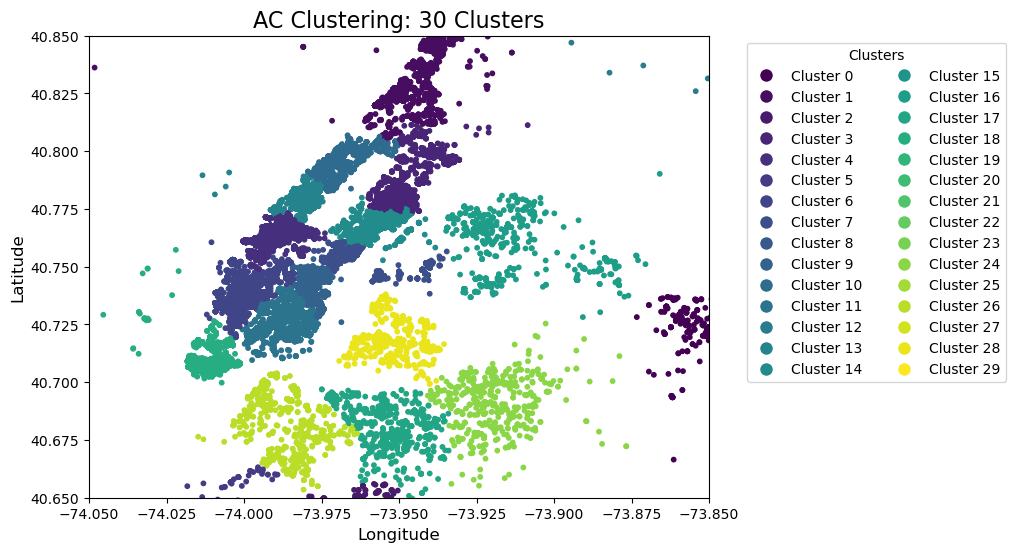

In [28]:
plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))

# Отображаем все точки, разделяя их по цвету на основании их кластера
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_ac_sklearn, cmap='viridis', s=10)

# Создаем фиктивные объекты для легенды (кружочки для каждого кластера)
legend_handles = []
unique_clusters = np.unique(y_ac_sklearn)  # Все уникальные кластеры, которые присутствуют в данных
for i in unique_clusters:
    legend_handles.append(mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / (len(unique_clusters) - 1)), markersize=10, label=f'Cluster {i}'))

# Задаем границы для осей X и Y
plt.xlim(-74.050, -73.85)  # для оси X
plt.ylim(40.650, 40.850)  # для оси Y

# Добавляем подписи
plt.title('AC Clustering: 30 Clusters', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Сдвигаем легенду вправо и разбиваем на 2 колонки
plt.legend(handles=legend_handles, title='Clusters', ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')

# Показываем график
plt.show()

### 5 Gaussian Mixture algorithm

EM-алгоритм — это общий метод для поиска параметров моделей с скрытыми переменными (например, GMM, HMM).

Gaussian Mixture (GMM) — это конкретная модель, которая использует EM-алгоритм для обучения.

1. EM-алгоритм (Expectation-Maximization)
Что это? Итеративный метод для оценки параметров моделей, где есть скрытые (ненаблюдаемые) переменные.

Как работает?

E-шаг (Expectation): Оценка скрытых переменных (например, вероятности принадлежности точки к кластеру).

M-шаг (Maximization): Обновление параметров модели на основе этих оценок.

Где применяется?

GMM (кластеризация),

HMM (скрытые марковские модели),

PCA с пропущенными данными,

и другие модели со скрытыми переменными.

In [29]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

In [30]:
%%time

# Количество кластеров
n_clusters = 30  

# Создаем и обучаем модель
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
data['cluster_label_gmm_scklearn'] = gmm.fit_predict(data[['longitude', 'latitude']])

CPU times: total: 4.11 s
Wall time: 3.75 s


## My

### 1. Инициализация параметров
- Задаем число компонент $K$ (кластеров).
- Инициализируем параметры смеси гауссиан:
  - Веса $\pi_k$ (доля каждого кластера в данных).
  - Средние $\mu_k$ (центры кластеров).
  - Ковариационные матрицы $\Sigma_k$ (размер и форма кластеров).

### 2. E-шаг (Expectation)
- Вычисляем вероятность принадлежности точки $x_i$ к кластеру $k$ с учетом текущих параметров:
  
  $$\gamma_{ik} = \frac{\pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \cdot \mathcal{N}(x_i | \mu_j, \Sigma_j)}$$

  где $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ — вероятность точки $x_i$ по многомерному нормальному распределению.

### Вычисление плотности многомерного нормального распределения

Функция плотности вероятности многомерного нормального распределения $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ вычисляется по следующей формуле:

$$
\mathcal{N}(x_i | \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) \right)
$$

### Обозначения:
- $x_i$ — вектор признаков точки $i$ (размерность $D$).
- $\mu_k$ — вектор среднего кластера $k$ (размерность $D$).
- $\Sigma_k$ — ковариационная матрица кластера $k$ (размерность $D \times D$).
- $|\Sigma_k|$ — определитель ковариационной матрицы.
- $\Sigma_k^{-1}$ — обратная ковариационная матрица.
 - Веса $\pi_k$ (доля каждого кластера в данных).  

### 3. M-шаг (Maximization)

N — общее число точек
k - количество кластеров и мы получаем средние, веса и ковариационные матрицы для каждого кластера,
то есть будет k штук таких.  

- Обновляем параметры гауссиан, вычисляя новые оценки на основе вероятностей $\gamma_{ik}$:

  **1)  Новые веса кластеров: (числа)**  
    $$\pi_k = \frac{N_k}{N}, \quad N_k = \sum_{i=1}^{N} \gamma_{ik}$$

  Например:  
  
  pi_k = np.array([0.4, 0.35, 0.25])

  **2)  Новые средние (вектора длиной n_features):**  
    $$\mu_k = \frac{1}{N_k} \sum_{i=1}^{N} \gamma_{ik} x_i$$
  
  Например:  
  
  mu_k = np.array([  
    [1.2, 0.5, -0.3, 2.1],  # среднее кластера 0  
    [0.0, -1.1, 0.4, 0.8],  # среднее кластера 1  
    [2.3, 1.4, 0.0, -0.7]   # среднее кластера 2  
])  
  
  
  **3) Новые ковариационные матрицы (): (матрицы размером n_features × n_features)**  
    $$\Sigma_k = \frac{1}{N_k} \sum_{i=1}^{N} \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T$$

  Например:   
    sigma_k = np.array([  
    [[1.0, 0.3], [0.3, 1.2]],  # ков. матрица для кластера 0  
    [[0.9, 0.0], [0.0, 0.8]],  # ков. матрица для кластера 1  
    [[1.5, 0.4], [0.4, 1.1]]   # ков. матрица для кластера 2  
])  


**Подробнее как находим ковариационный метрицы:**    

1) Вычисляем разницу diff:  
X - mu_k[k] — для каждой точки вычитаем среднее значение кластера k.

Результат: матрица размером (n_samples, n_features)  

2) Взвешиваем разницу по вероятностям:  

gamma[:, k, np.newaxis] * diff — каждая строка diff умножается на вероятность принадлежности точки к кластеру k.  

Результат: матрица того же размера (n_samples, n_features)  

3) Вычисляем взвешенную ковариацию:  
взвешенный_diff).T @ diff — матричное умножение транспонированной взвешенной разницы на саму разницу =  
$$\Sigma_k = \frac{1}{N_k} \sum_{i=1}^{N} \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T$$    

**получаем k матриц, где k - это количество кластеров**

### 4. Проверка сходимости
- Вычисляем log-likelihood:
  
  $$\log L = \sum_{i=1}^{N} \log \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k)$$

- Если изменение log-likelihood меньше порога, завершаем алгоритм, иначе повторяем шаги 2 и 3.

### 5. Присвоение меток
- Каждой точке $x_i$ присваиваем метку кластера с максимальной $\gamma_{ik}$:

  $$\text{label}(x_i) = \arg\max_k \gamma_{ik}$$

In [31]:
class My_GMM:
    def __init__(self, n_components, random_state=42):
        self.n_components = n_components # число компонент (количество кластеров или гауссиан)
        self.random_state = random_state
        np.random.seed(self.random_state) 

    def e_step(self, X, pi_k, mu_k, sigma_k):
        
        
        # d - количество признаков
        # k - количество кластеров
        
        # Матрица вероятности принадлежности точки  𝑥i к кластеру  𝑘
        # инициализируем матрицу размером (X.shape[0], self.n_components)
        gamma = np.zeros((X.shape[0], self.n_components)) 

        # Цикл по всем компонентам
        for k in range(self.n_components):
            
            # sigma_k[k] - ковариационная матрица для компоненты k (sigma_k: k матриц d x d)
            # mu_k[k] - среднее для компоненты k (mu_k: матрица k x d)
            # rv - вычисление плотности вероятности для каждой точки из набора данных X для компоненты k
            rv = multivariate_normal(mean=mu_k[k], cov=sigma_k[k])
            
            # множим плотность вероятности на вес компоненты pi_k[k] (pi_k - вектор размером d)
            # rv.pdf(X) - вектор размером X.shape[0]), мы его считаем для каждой компоненты k
            
            gamma[:, k] = pi_k[k] * rv.pdf(X) # заполняем k-ый столбец gamma

        # делим каждое значение на сумму всех значений в строен для нормализации
        gamma_sum = gamma.sum(axis=1, keepdims=True)
        gamma = np.where(gamma_sum == 0, 1e-10, gamma) / np.where(gamma_sum == 0, 1, gamma_sum)

        # Преобразуем NaN и бесконечные значения в 0 и 1e10 соответственно если вдруг такое случится
        gamma = np.nan_to_num(gamma, nan=0, posinf=1e10, neginf=-1e10)

        return gamma

    def m_step(self, X, gamma):
        N = X.shape[0] # количество строк
        N_k = gamma.sum(axis=0) # сумма по столбцам

        pi_k = N_k / N  # Обновляем веса кластеров (можно сказать среднее значение по столбцам, размер n_components)
        
        # Новые средние
        # gamma.T @ X - Каждое наблюдение умножается на свою вероятность принадлежности к каждому кластеру
        # получаем матрицу размером (n_components x d)
        
        # N_k - в-р размерности n_components, N_k[:, np.newaxis] спользуется для преобразования вектора N_k в столбец. 
        # Это создает новый размер, где N_k становится матрицей размерности (n_components x 1)
        
        mu_k = (gamma.T @ X) / N_k[:, np.newaxis]  

        # создаём 3-хмерный массив для хранения ковариационных матриц
        sigma_k = np.zeros((self.n_components, X.shape[1], X.shape[1]))
        
        # считаем ковариационные матрицы для каждой компоненты
        for k in range(self.n_components):
            diff = X - mu_k[k] # у матрицы X вычитаем среднее компоненты k (d-столбцов)
            
            # ковариационная матрица компоненты k
            # gamma[:, k, np.newaxis]: Эта часть кода выбирает все элементы для компоненты k(столбец) из матрицы gamma и
            # добавляет новую ось (что делает ее столбцом), получая размерность X.shape[0] x 1
            
            # умножаем на diff размером X.shape[0]×d, где каждый элемент в строке умножается на соответствующий элемент 
            # из gamma[:, k, np.newaxis]
            
            # транспонируем и получаем dxX.shape[0]
            
            # @ diff: умножаем матрицу dxX.shape[0] @ X.shape[0] x d и получаем dxd
            
            # / N_k[k], которое является скалярным значением
            
            sigma_k[k] = (gamma[:, k, np.newaxis] * diff).T @ diff / N_k[k] 

        return pi_k, mu_k, sigma_k

    def fit_predict(self, X):
        X = X.to_numpy() # переводим матрицу в numpy, а то вдруг она pandas
        n_samples, n_features = X.shape
        K = self.n_components

        pi_k = np.full(K, 1 / K) # задаём вектор размером n_componentsб, где элементы начальные веса как 1/количество компонент
        mu_k = X[np.random.choice(n_samples, K, replace=False)] # выбираем случайную строку из выборки
        sigma_k = np.array([np.eye(n_features) for _ in range(K)]) # ковариационные матрицы изначально диагональные по 1

        log_likelihood_old = -np.inf # начальное значение ф-ии правдоподобия
        tolerance = 1e-6 # порог
        max_iter = 100

        # повторяем E и M шаги
        for iteration in range(max_iter):
            gamma = self.e_step(X, pi_k, mu_k, sigma_k)
            pi_k, mu_k, sigma_k = self.m_step(X, gamma)

            # правдоподобие - сумма логарифма по всем компонентами произведения pi_k 
            # на плотность вероятности рассчитанная с помощью многомерного нормального распределения.
            # То есть мы получаем массив, где каждое значение — это вероятность конкретного объекта Xi
            
            # np.maximum: Поскольку вероятности могут быть очень малы, если они становятся равными 0, 
            # то при взятии логарифма возникает ошибка (log(0) неопределен).
            # Поэтому мы заменяем слишком маленькие значения на 10 в минус 10-ое степени
 
            
            log_likelihood_new = np.sum(np.log(np.maximum(np.sum([pi_k[k] * multivariate_normal(mean=mu_k[k], cov=sigma_k[k]).pdf(X) for k in range(self.n_components)], axis=0), 1e-10)))

            # если правдоподобие изменилось не сильно, то останавливаем цикл
            if np.abs(log_likelihood_new - log_likelihood_old) < tolerance:
                print(f"Сходимость достигнута на итерации {iteration+1}")
                break

            log_likelihood_old = log_likelihood_new

        # Сохраняем параметры для использования при предсказании
        self.pi_k = pi_k
        self.mu_k = mu_k
        self.sigma_k = sigma_k

        return gamma.argmax(axis=1)  # Возвращаем метки кластеров как максимальная вероятность в строке

    def predict(self, X):
        
        # тут уже знаем все параметры и можем вычислить gamma, соотвтественно берём макс значение
        # по каждой строке и получаем класс
        
        X = X.to_numpy()  # Если входные данные в DataFrame, преобразуем в numpy array
        gamma = np.zeros((X.shape[0], self.n_components))

        # Используем параметры, полученные после fit
        for k in range(self.n_components):
            rv = multivariate_normal(mean=self.mu_k[k], cov=self.sigma_k[k])
            gamma[:, k] = self.pi_k[k] * rv.pdf(X)

        gamma_sum = gamma.sum(axis=1, keepdims=True)
        gamma = np.where(gamma_sum == 0, 1e-10, gamma) / np.where(gamma_sum == 0, 1, gamma_sum)

        # Преобразуем NaN и бесконечные значения в 0 и 1e10 соответственно
        gamma = np.nan_to_num(gamma, nan=0, posinf=1e10, neginf=-1e10)

        return gamma.argmax(axis=1)  # Возвращаем метки кластеров как максимальная вероятность в строке

In [32]:
%%time 

# Количество кластеров
n_clusters = 30  

# Создаем и обучаем модель
gmm_My = My_GMM(n_components=n_clusters, random_state=42)
data['cluster_label_gmm_My'] = gmm_My.fit_predict(data[['longitude', 'latitude']])

CPU times: total: 19.1 s
Wall time: 19.1 s


####  Оценка силуэта

In [33]:
%%time

# Оценка силуэта sklearn
silhouette_gmm_sklearn = silhouette_score(data[['longitude', 'latitude']], data['cluster_label_gmm_scklearn'])
print(f"Silhouette Score: {silhouette_gmm_sklearn}")

Silhouette Score: 0.40683691375736447
CPU times: total: 51.1 s
Wall time: 21.1 s


In [34]:
%%time

# Оценка силуэта My
silhouette_gmm_My = silhouette_score(data[['longitude', 'latitude']], data['cluster_label_gmm_My'])
print(f"Silhouette Score: {silhouette_gmm_My}")

Silhouette Score: 0.11300917630088474
CPU times: total: 50 s
Wall time: 20 s


### Нарисуем кластеры

In [35]:
y_gmm_sklearn = data['cluster_label_gmm_scklearn'].values

y_gmm_My = data['cluster_label_gmm_My'].values

print(min(y_gmm_sklearn),max(y_gmm_sklearn))
print(min(y_gmm_My),max(y_gmm_My))
print(y_gmm_sklearn.shape)
print(X.shape)

0 29
0 29
(36257,)
(36257, 2)


### Sklearn

<Figure size 800x600 with 0 Axes>

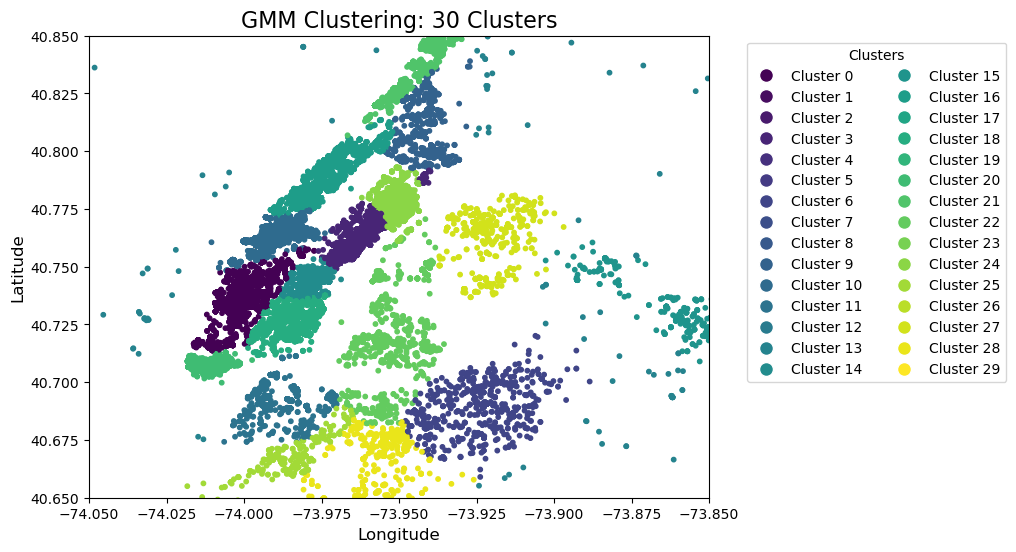

In [36]:
plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))

# Отображаем все точки, разделяя их по цвету на основании их кластера
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_gmm_sklearn, cmap='viridis', s=10)

# Создаем фиктивные объекты для легенды (кружочки для каждого кластера)
legend_handles = []
unique_clusters = np.unique(y_gmm_sklearn)  # Все уникальные кластеры, которые присутствуют в данных
for i in unique_clusters:
    legend_handles.append(mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / (len(unique_clusters) - 1)), markersize=10, label=f'Cluster {i}'))

# Задаем границы для осей X и Y
plt.xlim(-74.050, -73.85)  # для оси X
plt.ylim(40.650, 40.850)  # для оси Y

# Добавляем подписи
plt.title('GMM Clustering: 30 Clusters', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Сдвигаем легенду вправо и разбиваем на 2 колонки
plt.legend(handles=legend_handles, title='Clusters', ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')

# Показываем график
plt.show()

### My

<Figure size 800x600 with 0 Axes>

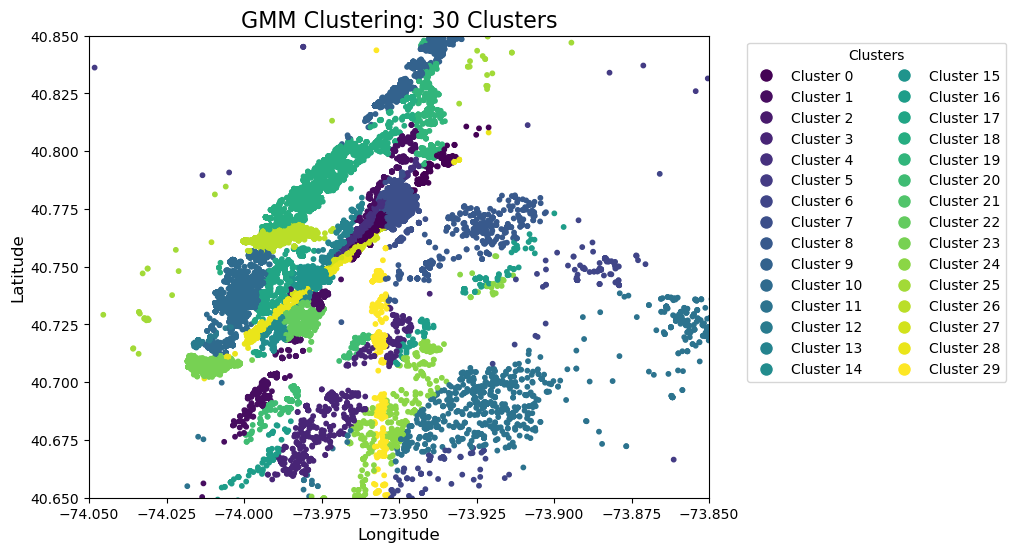

In [37]:
plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))

# Отображаем все точки, разделяя их по цвету на основании их кластера
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_gmm_My, cmap='viridis', s=10)


# Создаем фиктивные объекты для легенды (кружочки для каждого кластера)
legend_handles = []
unique_clusters = np.unique(y_gmm_My)  # Все уникальные кластеры, которые присутствуют в данных
for i in unique_clusters:
    legend_handles.append(mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / (len(unique_clusters) - 1)), markersize=10, label=f'Cluster {i}'))

# Задаем границы для осей X и Y
plt.xlim(-74.050, -73.85)  # для оси X
plt.ylim(40.650, 40.850)  # для оси Y

# Добавляем подписи
plt.title('GMM Clustering: 30 Clusters', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Сдвигаем легенду вправо и разбиваем на 2 колонки
plt.legend(handles=legend_handles, title='Clusters', ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')

# Показываем график
plt.show()

#### Результаты отличаются, но качественно показывают схожий результат и написанные методы отрабатывают за приемлемое время